In [42]:

import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import copy
import numpy as np

In [59]:
# Calculate RSS
def RSS(f1, f2):
    sum = 0
    for i in range(1,101):
        for j in range(1,101):
            sum += (f2[i][j]-f1[i][j])**2
    sum = math.sqrt(sum)
    print(sum)
    return sum

556.7764362830022
556.7764362830022
336.34060117684277
336.34060117684277
286.2745622649697
286.2745622649697
259.4691094330884
259.4691094330884
241.6532666229266
241.6532666229266
228.5309823899363
228.5309823899363
218.25700520113085
218.25700520113085
209.87948163866758
209.87948163866758
202.84715362150772
202.84715362150772
196.8139991743662
196.8139991743662
191.54951340960454
191.54951340960454
186.89294389906794
186.89294389906794
182.72802301141246
182.72802301141246
178.9681237118021
178.9681237118021
175.5470911801584
175.5470911801584
172.41334129961407
172.41334129961407
169.52592793267863
169.52592793267863
166.8518435875541
166.8518435875541
164.36411881676557
164.36411881676557
162.04045392742668
162.04045392742668
159.86221446386324
159.86221446386324
157.81368085071622
157.81368085071622
155.88147914222628
155.88147914222628
154.05414311475283
154.05414311475283
152.32177313562855
152.32177313562855
150.67576736976264
150.67576736976264
149.10860776740748
149.1086077

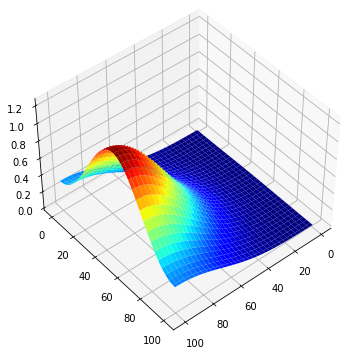

In [69]:
# 二次元配列の初期化
f = [[0] * 102 for i in range(102)]
f_pre = copy.deepcopy(f)
for j in range(1,30):
    f[50][j] = 0
for j in range(70,101):
    f[50][j] = 100


while RSS(f,f_pre) > 40:
    # 仮想点を加味してループにより処理する。
    f_tmp = copy.deepcopy(f)
    for i in range(1,101):
        for j in range(1,101):
            f[i][j]=(f_pre[i-1][j] + f_pre[i+1][j] + f_pre[i][j-1] + f_pre[i][j+1])/4
    # 仮想点の処理
    for i in range(102):
        f[i][0] = f[i][1]
        f[i][101] = f[i][100]
        f[0][i] = f[1][i]
        f[101][i] = f[100][i]
    f_pre = f_tmp

# プロット
X, Y = np.meshgrid(np.arange(102), np.arange(102))
Z = np.array(f)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=50)
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0)
plt.show()

In [ ]:
    x = np.arange(len(f1[0]))
    y = np.arange(len(f1))

    X, Y = np.meshgrid(x, y)
    Z = np.array(f1)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='bwr', linewidth=0)
    fig.colorbar(surf)
    plt.show()

 100.0%57.227615711297986
 100.0%15.411035007422441
 100.0%8.992184106211349
 100.0%6.532670300114647
 100.0%5.237726305895407
 100.0%4.4406005343273955
 100.0%3.899750452127314
 100.0%3.507452154023538
 100.0%3.208753954107702
 0.0%2.9728121361042543
 100.0%2.7810214973880707
 100.0%2.6215077353141334
 100.0%2.48633976493665
 100.0%2.37001804649464
 100.0%2.268607464105037
 100.0%2.1792160999630985
 100.0%2.0996692688493512
 100.0%2.028298625284264
 100.0%1.9638016459838845
 0.0%1.905145560610762
 100.0%1.85150015915725
 100.0%1.802189832900239
 100.0%1.756658713283151
 100.0%1.714444909557803
 100.0%1.6751611817702767
 100.0%1.6384802405194356
 100.0%1.6041234235884043
 100.0%1.571851871642023
 100.0%1.541459577308934
 0.0%1.5127678555137685
 100.0%1.485620904127703
 100.0%1.459882209798662
 100.0%1.435431615318781
 100.0%1.4121629094911383
 100.0%1.3899818331723985
 100.0%1.3688044194174669
 100.0%1.3485556038071784
 100.0%1.3291680547629736
 100.0%1.3105811841188757
 0.0%1.29274030

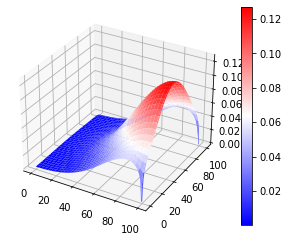

In [2]:
import math
import copy as cp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
#ポテンシャル f の定義: 101×101 のメッシュを生成(それぞれの辺の端一列は外部仮想

f = [[] for i in range(101)]
#一度すべての節点をゼロにする
for i in range(len(f)):
    j=0
    while j<101:
        f[i].append(0.0)
        j+=1
#境界条件を代入

for i in range(20):
    f[50][i]=0.0
    f[50][i+80]=20
#ポアソン方程式の差分方程式を反復法で計算する関数
def iteration(fp):
    fn = cp.deepcopy(f)
    for i in range(len(fp)-2):
        k = i+1 #外部仮想節点は飛ばす
        for j in range(len(fp[k])-2):
            l = j+1 #外部仮想節点は飛ばす
            fn[k][l]=(fp[k-1][l] + fp[k+1][l] + fp[k][l-1] + fp[k][l+1])/4

    return cp.deepcopy(fn)
#残差を求める関数
def residual(f1, f2):
    sum = 0
    for i in range(len(f1)-2):
        i = i+1 #外部仮想節点は飛ばす
        for j in range(len(f1[i])-2):
            j = j+1 #外部仮想節点は飛ばす
            sum += (f2[i][j]-f1[i][j])**2
    res = math.sqrt(sum)
    return res
#以下メイン関数
def main():
    res = 1 #残差の初期値
    f1 = cp.deepcopy(f) #計算前の数値格納用
    f2 = cp.deepcopy(f) #計算後の数値格納用
    num = 0 #計算回数の初期値
 #残差の 2 乗平均が設定値未満になるまで反復法を繰り返す
    while res > 0.1:
 #ポアソン方程式の差分方程式に代入
        f2 = iteration(f1)

 #残差を求める
        res = residual(f1, f2)

        #ポテンシャルの更新
        f1 = cp.deepcopy(f2)
        #仮想節点を更新
        for i in range(len(f1)-2):
            f1[i][0] = cp.deepcopy(f2[i][1])
            f1[i][100] = cp.deepcopy(f1[i][99])
        for j in range(len(f1[0])-2):
            f1[0][j] = cp.deepcopy(f1[1][j])
            f1[100][j] = cp.deepcopy(f1[99][j])
        #計算回数を更新
        num += 1
        #10 回ごとに進行状況を表示
        status = 0
        if num % 10 == 0:
            status = (100 - 100 * (res-0.1))/(res + 0.9)
        if status < 0:
            status = 0
            print('\r', '{:.1f}'.format(status), end='%')
        else:
            print('\r', '100.0', end='%')
        print(res)
 #計算回数を表示
    print('計算回数:', num)
 #プロットの作成
    x = np.arange(len(f1[0]))
    y = np.arange(len(f1))

    X, Y = np.meshgrid(x, y)
    Z = np.array(f1)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='bwr', linewidth=0)
    fig.colorbar(surf)
    plt.show()
if __name__ == '__main__':
    main() 